<a href="https://colab.research.google.com/github/Ahmed-Haitham/Uncovering-Hidden-Patterns-of-Global-Terrorism-Casualties/blob/main/Uncovering_Hidden_Patterns_of_Terrorism_Casualties_Using_Association_Rules_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🔍🌍 Uncovering Hidden Patterns of Global Terrorism Casualties:** An Analysis Using Association Rules Technique
**By: Ahmed Haitham Abdelmaksoud**

Data Science and Business Analytics Master's Student

Faculty of Economic Sciences

University of Warsaw

<img src = "https://www.silvergames.com/thumbnail/banner/j/l/terrorist.jpg" width = "1500px" height = "300px">

##**Project Description**:

The project aims to identify hidden patterns in global terrorism casualties using association rules analysis. The study will use data on terrorist incidents and the resulting casualties worldwide to identify patterns and relationships that could help predict future attacks and prevent casualties. The association rules technique is a powerful data mining method that can reveal hidden correlations and relationships in large datasets. By applying this technique to terrorism casualty data, the project aims to uncover previously unknown patterns that can aid policymakers and law enforcement agencies in combating terrorism. Ultimately, the project aims to contribute to a safer and more secure global environment by improving our understanding of the patterns and dynamics of terrorism casualties.

## **About The Dataset**

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

* Geography: Worldwide

* Time period: 1970-2017, except 1993

* Unit of analysis: Attack

* Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

##**Importing necessary tools:**

In [51]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('fivethirtyeight')
sns.color_palette("icefire", as_cmap=True)

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

## **Data Cleaning and Preprocessing**


**Uploading Global Terrorism Database**

In [52]:
from google.colab import files
data_to_load = files.upload()

import io
data_orig = pd.read_csv(io.BytesIO(data_to_load['global_terrorism_db.csv']), encoding='ISO-8859-1')

Saving global_terrorism_db.csv to global_terrorism_db (1).csv


In [167]:
data_df = data_orig.copy()

In [168]:
data_df.shape

(181691, 135)

We will eliminate extraneous variables and modify the names of some variables to better suit our analysis, thus ensuring clarity in our research by focusing on a specific set of variables.

Variables that are important for the analysis: 
1. **iyear**
2. **imonth**
3. **iday**
4. **country_txt** - Name of country.
5. **region_txt** - Name of region.
6. **city**
7. **latitude**
8. **longitude**
9. **summary** - event summary, what happened? when etc.
10. **multiple** - was the attack part of a multiple attack event?
11. **attacktype1_txt** - Of what type was the attack? I.e. assassination, bombing or kidnapping.
12. **targtype1_txt** - What target did the attack have? I.e. business, government or police.
13. **targsubtype1_txt** 
14. **gname** - Name of the organized group, if applicable.
15. **weaptype1_txt** - What weapon was used?
16. **nkill** - Number of confirmed kills.
17. **nwound** - Number of confirmed wounded
18. **nkillter** - fatalities of perpetrator(s) 

In [169]:
import pandas as pd
import numpy as np

data = data_df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'summary', 'multiple', 
                'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'nkillter']]

data = data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'country_txt': 'country', 'region_txt': 'region', 
                                  'multiple': 'multiple_attack', 'attacktype1_txt': 'attacktype', 'targtype1_txt': 'target_type', 
                                  'targsubtype1_txt': 'target_sub_type', 'gname': 'group_name', 'weaptype1_txt': 'weapon_type'})

data['decade'] = np.select([data['year'] < 1980,
                            data['year'] < 1990,
                            data['year'] < 2000,
                            data['year'] < 2010,],
                            ['70s', '80s', '90s', '2000s',], default='2010s')

data['decade'] = pd.Categorical(data['decade'], categories=['70s', '80s', '90s', '2000s', '2010s'])


In [170]:
data.head().T

,0,1,2,3,4
year,1970,1970,1970,1970,1970
month,7,0,1,1,1
day,2,0,0,0,0
country,Dominican Republic,Mexico,Philippines,Greece,Japan
region,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka
latitude,18.456792,19.371887,15.478598,37.99749,33.580412
longitude,-69.951164,-99.086624,120.599741,23.762728,130.396361
summary,NaN,NaN,NaN,NaN,NaN
multiple_attack,0.0,0.0,0.0,0.0,0.0


**Checking Data Types**

In [171]:
data.dtypes

year                  int64
month                 int64
day                   int64
country              object
region               object
city                 object
latitude            float64
longitude           float64
summary              object
multiple_attack     float64
attacktype           object
target_type          object
target_sub_type      object
group_name           object
weapon_type          object
nkill               float64
nwound              float64
nkillter            float64
decade             category
dtype: object

**Checking Duplicates & Null Values**

In [172]:
data.duplicated().sum()

10683

In [173]:
# Removing Duplicates
data = data.drop_duplicates(keep=False)

In [174]:
data.isnull().sum().sort_values(ascending=False)

nkillter           55744
summary            54900
nwound             14544
target_sub_type     9155
nkill               8797
longitude           3845
latitude            3844
city                 434
multiple_attack        1
weapon_type            0
group_name             0
year                   0
target_type            0
attacktype             0
month                  0
region                 0
country                0
day                    0
decade                 0
dtype: int64

In [175]:
# Weapontype column contains very long name for vehicle property -> shorten.
data.weapon_type.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)


# Ensure consistent values for object type variables and make everything lowercase.
for col in data.columns:
  if data[col].dtypes == 'object':
    data[col] = data[col].str.lower() 
    if col == 'summary':
      data[col] = data[col].fillna('NaN').replace('unk','unknown')
    else:
      data[col] = data[col].fillna('unknown').replace('unk','unknown')


# Some nwound, nkillter and nkill are NaN. Replace them with median.
data.nkill = np.round(data.nkill.fillna(data.nkill.median())).astype(int) 
data.nwound = np.round(data.nwound.fillna(data.nwound.median())).astype(int)
data.nkillter = np.round(data.nkillter.fillna(data.nkillter.median())).astype(int)

# Checking again for null values
data.isna().sum().sort_values(ascending=False)


longitude          3845
latitude           3844
multiple_attack       1
target_type           0
nkillter              0
nwound                0
nkill                 0
weapon_type           0
group_name            0
target_sub_type       0
year                  0
attacktype            0
month                 0
summary               0
city                  0
region                0
country               0
day                   0
decade                0
dtype: int64

📌 **Our Data is Clean for Analysis**

## **Exploratory Data Analysis**



###**Count of Terrorist Incidents**

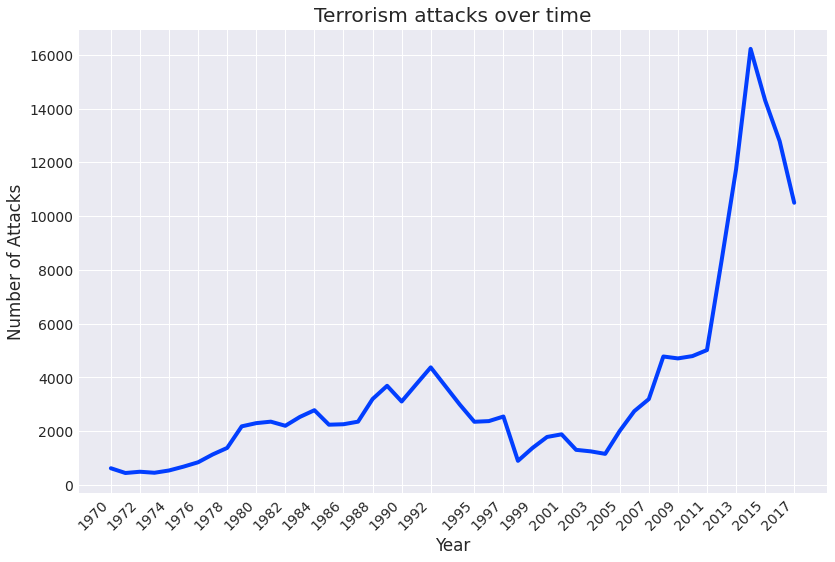

In [176]:
counts = data['year'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
plt.plot(counts.index, counts.values)
plt.xticks( counts.index[::2], rotation=45, ha='right')
plt.title('Terrorism attacks over time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


📌 **Based on the graph, one could arrive at the alarming realization that the number of terrorist attacks has significantly risen in the past five years. However, it's crucial to consider the effectiveness of data collection since 2012.**

In [177]:
no_of_attacks = data.shape[0]
no_of_attacks

167033

📌 **More than 160,000 attaks happened!**

###**Breakdown of Terrorist Attack Types**

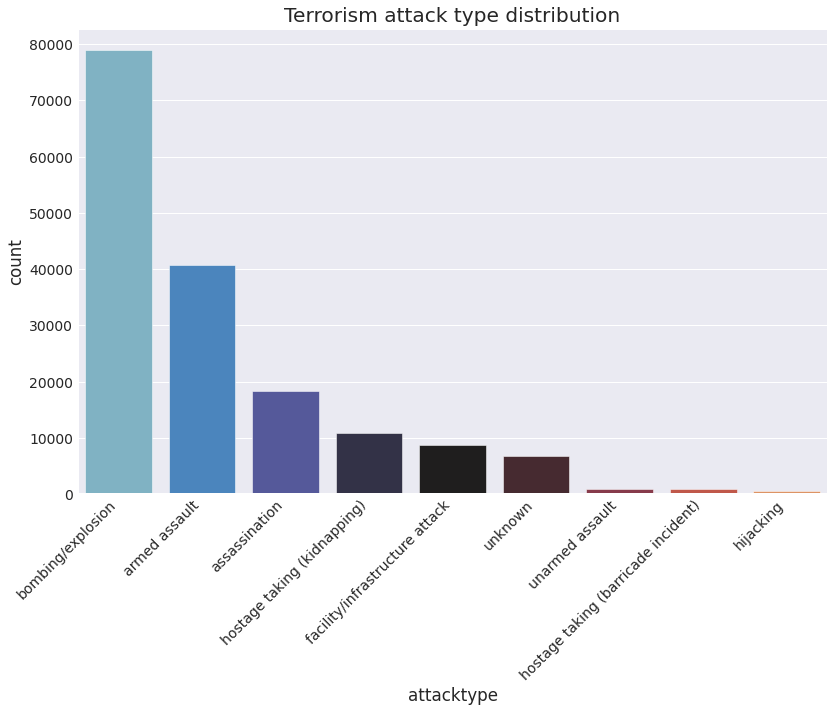

In [178]:
# Sort the dataframe by the count of occurrences
df_sorted = data.groupby('attacktype').size().reset_index(name='count').sort_values('count', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='attacktype', y='count', data=df_sorted, palette = "icefire")
plt.xticks(rotation=45, ha='right')
plt.title('Terrorism attack type distribution')
plt.show()

📌 **There have been around 80,000 bombings, making it the largest grouping of attacks. The second largest grouping is armed assault, with around 40,000 attacks.**

### **Distribution of Targets**
Let's examine the types of targets that are commonly targeted by terrorists.

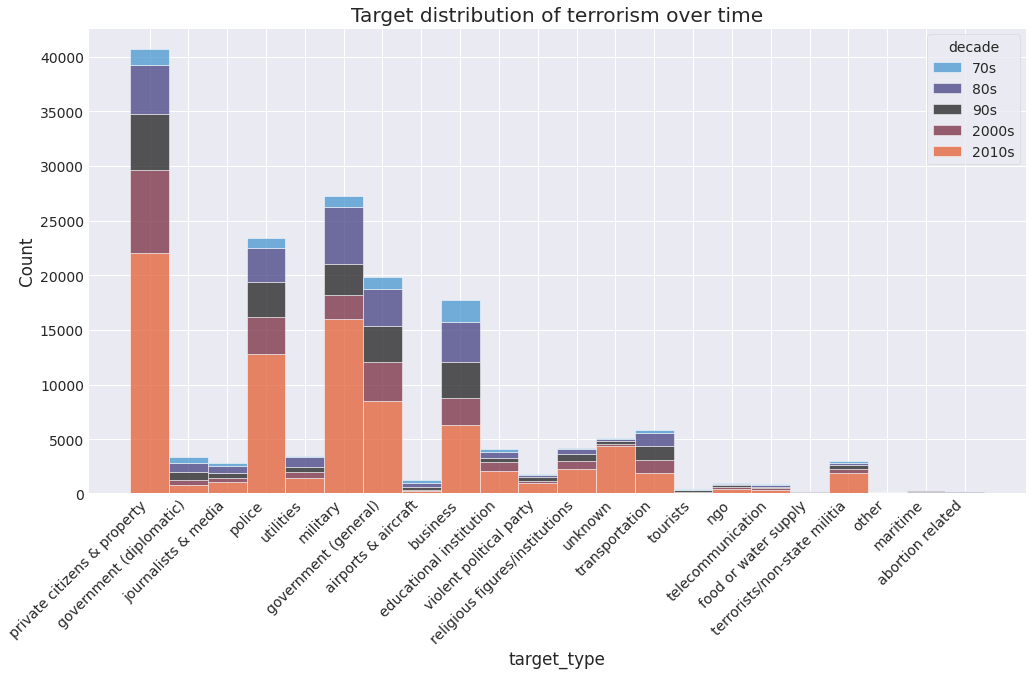

In [179]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x='target_type', hue='decade', multiple='stack', palette = "icefire")
plt.xticks(rotation=45, ha='right')
plt.title('Target distribution of terrorism over time')
plt.show()

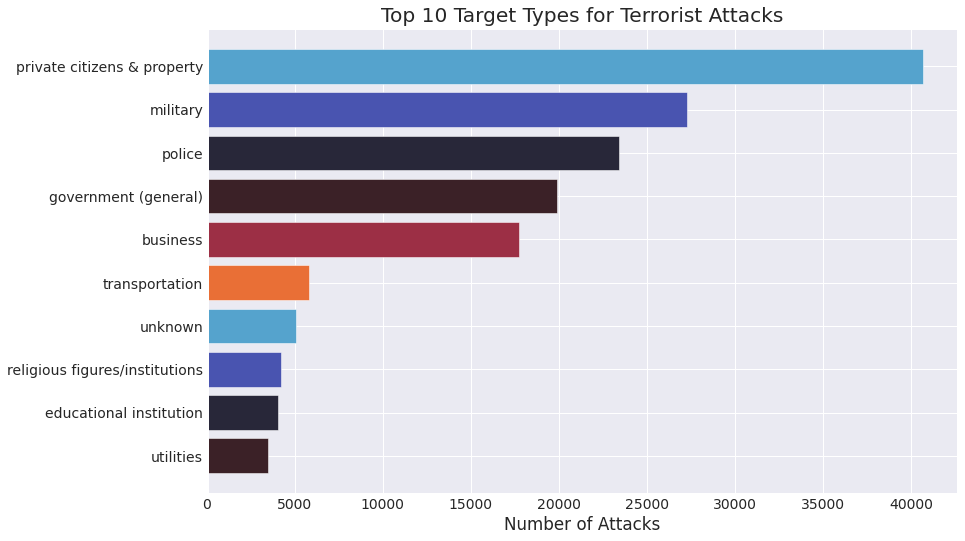

In [180]:
# group data by target_type and count the number of attacks for each target
target_counts = data.groupby('target_type')['target_type'].count().sort_values(ascending=False)

# select the top 10 targets with the most attacks
top_targets = target_counts.head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette("icefire", as_cmap= False)
ax.barh(top_targets.index, top_targets.values, align='center', color = colors)
ax.invert_yaxis()  # invert y-axis to show targets with most attacks at the top
ax.set_xlabel('Number of Attacks')
ax.set_title('Top 10 Target Types for Terrorist Attacks')
plt.show()

📌 **The table shows the top 10 target types for terrorist attacks, with "Private Citizens & Property" being the most targeted group, followed by "Military" and "Police". The data suggests that terrorists tend to target civilian targets more frequently than governmental or religious targets.**

### **Geographic distribution of terrorism (by region/country/city)**
We will visualize the global occurrence of terrorist attacks 

In [181]:
rush = data.groupby(["latitude", "longitude"])["country"].count().reset_index()
rush.columns=["Lat", "Lon", "no of incidents"]
rushsort = rush.sort_values(by="no of incidents", ascending=False)
rushsort

,Lat,Lon,no of incidents
32285,33.303566,44.371773,7485
40767,36.354145,43.143570,2085
23192,24.891115,67.143311,2084
48331,54.607712,-5.956210,1915
4110,2.059819,45.326115,1515
...,...,...,...
18731,16.477743,-90.456422,1
18732,16.477935,43.090605,1
18735,16.483333,121.150000,1
18737,16.490256,104.565527,1


In [182]:
geo=pd.DataFrame({'country': data['country'].value_counts().index,
                   'Number_of_Attacks': data['country'].value_counts().values})

fig = px.choropleth(geo, locations="country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="country", range_color=[1, 1000], 
                    color_continuous_scale="amp", 
                    title='Geographic distribution of Attacks')
fig.update(layout_coloraxis_showscale=True)
fig.show()

**Number of Terrorist Attacks per Region**

In [183]:
data.groupby('region') \
  .size() \
  .reset_index(name='no_of_attacks') \
  .sort_values('no_of_attacks', ascending=False) \
  .head(10)

,region,no_of_attacks
5,middle east & north africa,47948
8,south asia,42972
10,sub-saharan africa,16837
7,south america,15058
11,western europe,14296
9,southeast asia,11899
1,central america & caribbean,8349
4,eastern europe,4933
6,north america,3259
3,east asia,667


Text(0, 0.5, '')

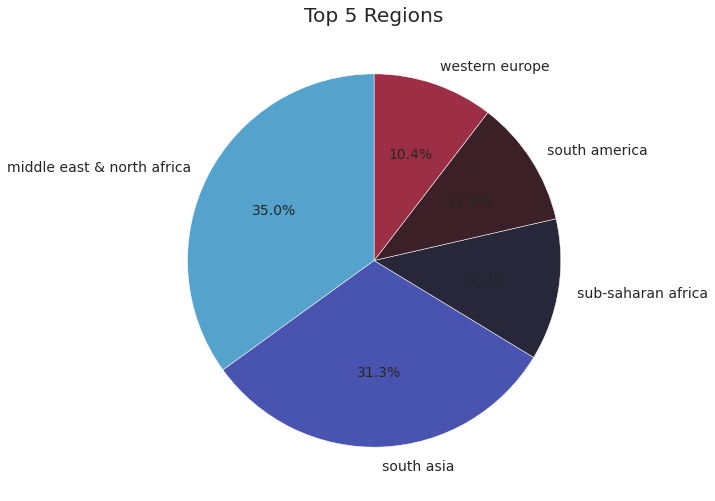

In [184]:
top5_region = data['region'].value_counts()[:5].sort_values(ascending=False)
colors = sns.color_palette("icefire", as_cmap= False)
plot = top5_region.plot(kind='pie',autopct="%1.1f%%",figsize=(15,8), startangle = 90, colors = colors, title = "Top 5 Regions")
plot.set_ylabel(None)

📌 **Middle East and North Africa, South Asia and Sub-Saharan Africa are the top three regions in terms of number of attacks.**


**Number of Terrorist Attacks per Country**

In [185]:
data.groupby('country') \
  .size() \
  .reset_index(name='no_of_attacks') \
  .sort_values('no_of_attacks', ascending=False) \
  .head(10)


,country,no_of_attacks
84,iraq,23171
134,pakistan,13572
0,afghanistan,12421
80,india,11427
35,colombia,7069
140,philippines,6679
188,united kingdom,4786
139,peru,4426
159,somalia,4094
183,turkey,3939


📌 **Iraq, Pakistan, Afhganistan, India and Colombia are the top five countries in terms of number of attacks**

**Number of Terrorist Attacks per City**

In [186]:
data[data['city'] != 'unknown'] \
  .groupby('city') \
  .size() \
  .reset_index(name='no_of_attacks') \
  .sort_values('no_of_attacks', ascending=False) \
  .head(10)


,city,no_of_attacks
3017,baghdad,7553
22602,mosul,2103
15890,karachi,2056
4468,belfast,1899
22295,mogadishu,1558
19368,lima,1366
29460,santiago,1110
29214,san salvador,1023
17278,kirkuk,913
4382,beirut,873


📌 **Top 3 cities in terms of attacks are: Baghdad (Iraq), Mosul (Iraq) and Karachi (Pakistan)**

### **Distribution of Terrorist Groups**
Who are doing these attacks?

In [187]:
top10_groups = data[data['group_name'] != "unknown"] \
    .groupby('group_name') \
    .agg(no_of_attacks=('group_name', 'count')) \
    .sort_values(by='no_of_attacks', ascending=False) \
    .head(10)
top10_groups

,no_of_attacks
group_name,
taliban,7229
islamic state of iraq and the levant (isil),5075
shining path (sl),3314
al-shabaab,3241
new people's army (npa),2669
boko haram,2363
revolutionary armed forces of colombia (farc),2321
irish republican army (ira),2294
farabundo marti national liberation front (fmln),2211


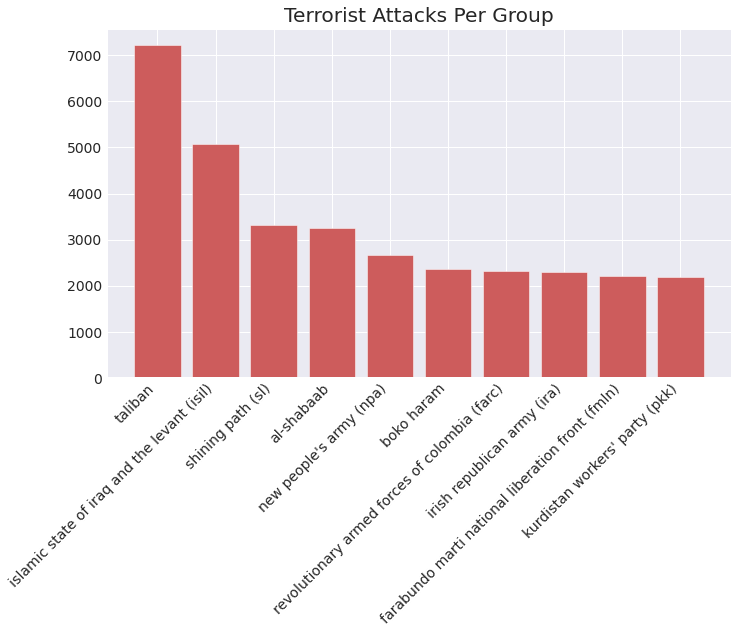

In [242]:
plt.subplots(figsize=(10,6))
plt.bar(top10_groups.index, top10_groups['no_of_attacks'], color = 'indianred')
plt.xticks(rotation=45, ha='right')
plt.title('Terrorist Attacks Per Group')
plt.show()

### **Activity of Terrorist Groups Over Time**

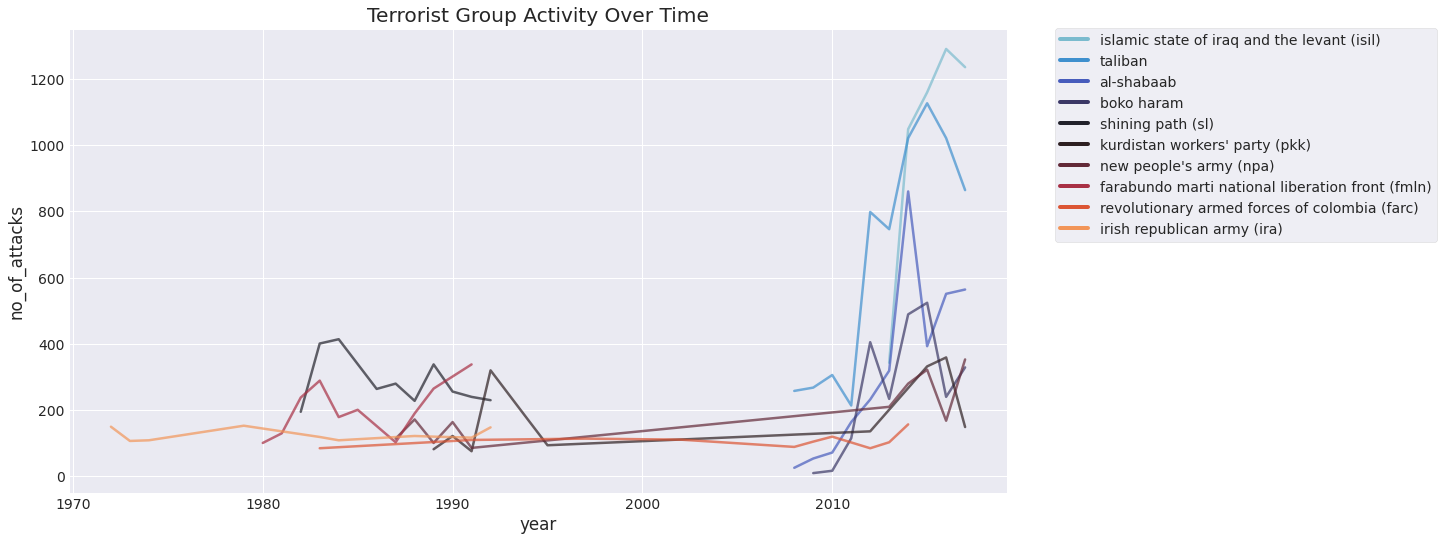

In [189]:
# Preparing the table
top10_groups_activity = data[data['group_name'].isin(["taliban", "shining path (sl)", "islamic state of iraq and the levant (isil)", 
                                                      "farabundo marti national liberation front (fmln)", "al-shabaab", 
                                                      "irish republican army (ira)", "revolutionary armed forces of colombia (farc)", 
                                                      "new people's army (npa)", "kurdistan workers' party (pkk)", "boko haram"])]\
    .groupby(['year', 'group_name'])['group_name']\
    .count()\
    .reset_index(name='no_of_attacks')\
    .sort_values(['no_of_attacks'], ascending=False)\
    .groupby(['group_name']).head(10)

# Plotting the results
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.lineplot(data=top10_groups_activity, x="year", y="no_of_attacks", hue="group_name", linewidth=2.5, alpha=0.7, palette= 'icefire')
plt.title("Terrorist Group Activity Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()


📌 **Since 2000, the recent surge in terrorist activity has been driven by four main groups:**
* Taliban
* Boko Haram
* NPA
* ISIL

**FARC has experienced a slight increase in activity during this period, while IRA and Shining Path have demonstrated a decline in activity.**

### **Weapon Choice Over Time**
Has the growth of technology influenced the weapons used by terrorists?

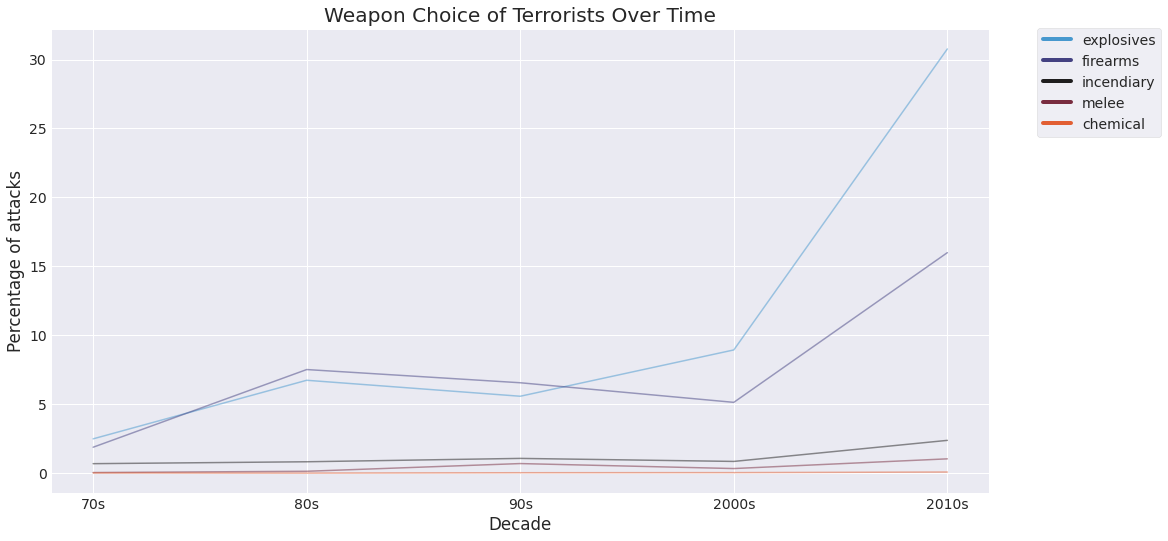

In [190]:
# Preparing the table
dfweapons = data[['year', 'weapon_type', 'decade']]
dfweapons = dfweapons[dfweapons['weapon_type'] != 'unknown']

top15_weapons = dfweapons.groupby(['decade', 'weapon_type'])\
.size()\
.reset_index(name='no_of_attacks')\
.sort_values(['decade', 'no_of_attacks'], ascending=[True, False])\
.groupby('decade')\
.head(5)\
.assign(percent=lambda x: x.no_of_attacks / x.no_of_attacks.sum() * 100)\
.reset_index(drop=True)

# Plotting the results
plt.figure(figsize=(15,8))
sns.lineplot(data=top15_weapons, x='decade', y='percent', hue='weapon_type', linewidth=1.5, alpha=0.5, palette= "icefire")
plt.title('Weapon Choice of Terrorists Over Time')
plt.xlabel('Decade')
plt.ylabel('Percentage of attacks')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

📌 **It appears that explosives and firearms have consistently been the most commonly used weapons. The top three choices of weapons have remained entirely consistent over time.**

### **Evolution of Target Selection Over Time**
Have Terrorists Altered Their Choice of Targets?

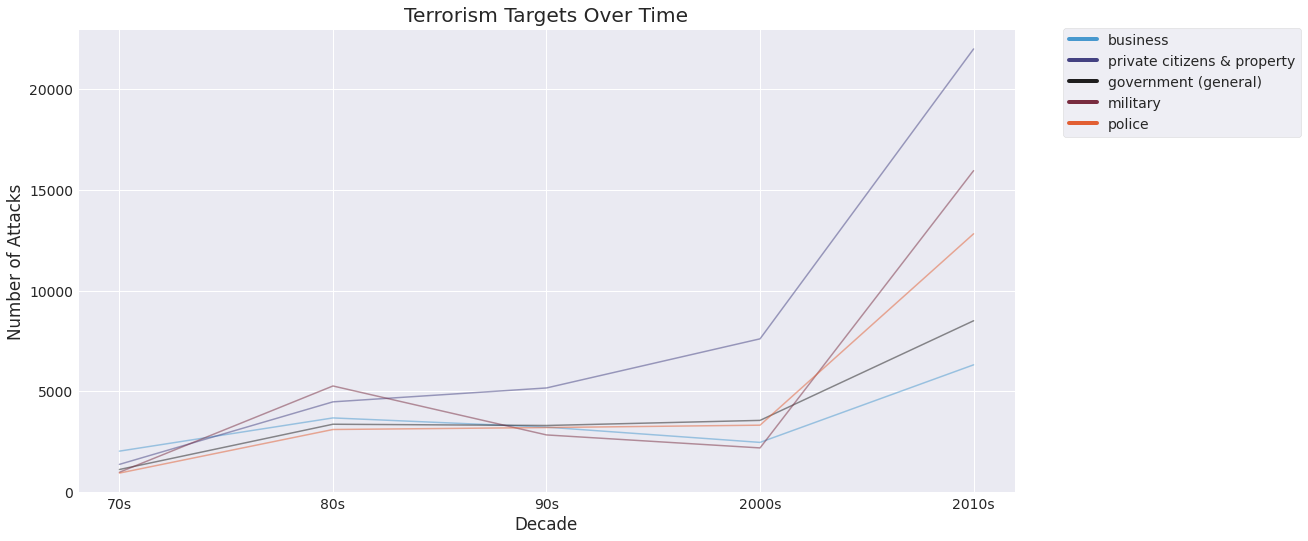

In [191]:
# Preparing the table
dftargets = data[['year', 'target_type', 'target_sub_type', 'decade']]
dftargets = dftargets[dftargets['target_type'] != "unknown"]

dftargetstop = (dftargets.groupby(['decade', 'target_type'])['year']
                 .count()
                 .reset_index(name='no_of_attacks')
                 .query('target_type != "unknown"')
                 .groupby('decade')
                 .apply(lambda x: x.nlargest(5, 'no_of_attacks'))
                 .reset_index(drop=True)
                 .sort_values(['decade', 'no_of_attacks'], ascending=[True, False]))

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=dftargetstop, x='decade', y='no_of_attacks', hue='target_type', linewidth=1.5, alpha=0.5, palette= "icefire")
ax.set_title('Terrorism Targets Over Time')
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Attacks')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()


📌 **Based on the data, it is evident that private citizens have become a significantly larger target group compared to the past. It appears that violence has escalated towards this innocent group. Furthermore, over the decades, the Military has increasingly become a target.**

## **Association Rules**

### **What are some typical connections between weapon type, target type, and group?**

In the context of terrorism, each group has its own specific target type, weapon type, and unique style, which distinguishes them from other groups. This is often referred to as their "signature style." However, is this notion accurate? To explore this, we can apply an Apriori Association algorithm to the dataset, using the group names of the organizations as consequents of interest, to determine how frequently they "appear together." We will use the arules library for this purpose.

### **Preparing data for initial association analysis.**

In [192]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:
# Create a new dataset containing only the relevant variables
df_rules = data[['country', 'region', 'attacktype', 'target_type', 'group_name', 'target_sub_type', 'weapon_type', 'nkill', 'nwound']]

In [195]:
# Change nkill and nwound to categorical variables
df_rules['nkill'] = np.where(df_rules['nkill']==0, 0, 
                  np.where(df_rules['nkill']<2, 1, 
                  np.where(df_rules['nkill']<6, 2, 
                  np.where(df_rules['nkill']<16, 3, 4))))
df_rules['nkill'] = df_rules['nkill'].astype('category')

df_rules['nwound'] = np.where(df_rules['nwound']==0, 0, 
                   np.where(df_rules['nwound']<2, 1, 
                   np.where(df_rules['nwound']<6, 2, 
                   np.where(df_rules['nwound']<16, 3, 4))))
df_rules['nwound'] = df_rules['nwound'].astype('category')


In [196]:
# Change other columns to categorical variables
cols_to_convert = ['country', 'region', 'attacktype', 'target_type', 'group_name', 'target_sub_type', 'weapon_type']

for col in cols_to_convert:
    df_rules[col] = df_rules[col].astype('category')


In [197]:
df_rules.dtypes

country            category
region             category
attacktype         category
target_type        category
group_name         category
target_sub_type    category
weapon_type        category
nkill              category
nwound             category
dtype: object

In [198]:
one_hot = pd.get_dummies(df_rules)
one_hot.head()

,country_afghanistan,country_albania,country_algeria,country_andorra,country_angola,country_antigua and barbuda,country_argentina,country_armenia,country_australia,country_austria,...,nkill_0,nkill_1,nkill_2,nkill_3,nkill_4,nwound_0,nwound_1,nwound_2,nwound_3,nwound_4
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [199]:
one_hot.shape

(167033, 3877)

In [200]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Building the model
frequent_itemsets  = apriori(one_hot, min_support=0.01, use_colnames=True, max_len=5)

In [201]:
# Collecting the inferred rules in a dataframe
terror_rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1)
terror_rules = terror_rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(terror_rules.head())

                                     antecedents  \
683          (target_sub_type_non-state militia)   
195                      (country_united states)   
2163            (nkill_0, country_united states)   
2169           (nwound_0, country_united states)   
9260  (nkill_0, nwound_0, country_united states)   

                                     consequents  antecedent support  \
683   (target_type_terrorists/non-state militia)            0.011914   
195                       (region_north america)            0.016236   
2163                      (region_north america)            0.014105   
2169                      (region_north america)            0.014123   
9260                      (region_north america)            0.012644   

      consequent support   support  confidence       lift  leverage  \
683             0.017811  0.011914         1.0  56.145546  0.011702   
195             0.019511  0.016236         1.0  51.252838  0.015920   
2163            0.019511  0.014105       

In [202]:
output = list(frequent_itemsets)

In [203]:
def inspect(rule):
    """
    Returns a list of the lhs, rhs, support, confidence, and lift values for an association rule.
    """
    lhs = list(rule['antecedents'])
    rhs = list(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    return list(zip(lhs, rhs, support, confidence, lift))

In [204]:
output_df = pd.DataFrame(inspect(terror_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_df.sort_values(by='Lift', ascending=False).head(10)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
2284,"(attacktype_bombing/explosion, target_type_edu...",(target_sub_type_school/university/educational...,0.011195,0.883743,77.896691
1244,(target_sub_type_school/university/educational...,"(attacktype_bombing/explosion, target_type_edu...",0.011195,0.986807,77.896691
2410,"(weapon_type_explosives, target_type_education...",(target_sub_type_school/university/educational...,0.011195,0.868959,76.877567
1157,(target_sub_type_school/university/educational...,"(weapon_type_explosives, target_type_education...",0.011195,0.990466,76.877567
3184,"(nkill_0, region_north america)","(nwound_0, country_united states)",0.012644,0.798488,56.538278
2188,"(nwound_0, country_united states)","(nkill_0, region_north america)",0.012644,0.895295,56.538278
1387,"(region_western europe, group_name_basque fath...",(country_spain),0.010483,0.977121,56.357519
5638,(country_spain),"(region_western europe, group_name_basque fath...",0.010483,0.604627,56.357519
5639,(country_spain),(group_name_basque fatherland and freedom (eta)),0.010483,0.604627,56.294690
5640,"(country_spain, region_western europe)",(group_name_basque fatherland and freedom (eta)),0.010483,0.604627,56.294690


There is strong correlation between factors, indicated by the high confidence level in some rules. To address this, we can remove variables that are highly correlated with each other, such as target_sub_type (which is correlated with target_type) and location variables (country and region, which are highly correlated with group_names). Additionally, we can remove any instances of 'unknown' variables.

In [205]:
columns_to_filter = ['group_name', 'attacktype', 'target_type', 'nkill', 'nwound', 'weapon_type']

for column in columns_to_filter:
  df_rules = df_rules[df_rules[column] != 'unknown']

df_rules = df_rules.drop(['target_sub_type', 'region', 'country'], axis=1)
df_rules.head()

,attacktype,target_type,group_name,weapon_type,nkill,nwound
5,armed assault,police,black nationalists,firearms,0,0
6,assassination,police,tupamaros (uruguay),firearms,0,0
8,facility/infrastructure attack,military,new year's gang,incendiary,0,0
9,facility/infrastructure attack,government (general),new year's gang,incendiary,0,0
10,bombing/explosion,military,"weather underground, weathermen",explosives,0,0


In [206]:
df_rules.shape

(77131, 6)

We will focus only on the consequents that belong to the top 10 most active terrorist groups. This will help us identify the antecedents associated with these groups. For instance, if a terrorist attack takes place on a police station using a grenade, we can identify the group responsible for this attack.

In [207]:
df_rules.groupby('group_name')\
    .agg(nr_of_attacks=('group_name', 'count'))\
    .sort_values('nr_of_attacks', ascending=False)\
    .head(10)

,nr_of_attacks
group_name,
taliban,5762
islamic state of iraq and the levant (isil),3840
shining path (sl),3030
al-shabaab,2651
new people's army (npa),2329
irish republican army (ira),2201
farabundo marti national liberation front (fmln),2136
boko haram,2118
kurdistan workers' party (pkk),1942


We are also removing nwound as it is adding too much noise to the results.





In [208]:
df_rules = df_rules.drop('nwound', axis=1)

###**Beginning with Taliban - Association Rules.**

In [209]:
one_hot = pd.get_dummies(df_rules)

In [210]:
target_group = 'taliban'

taliban_rules = apriori(one_hot, min_support=0.01, use_colnames=True, max_len=5)
taliban_rules = association_rules(taliban_rules, metric="confidence", min_threshold=0.1)
taliban_rules = taliban_rules[taliban_rules['consequents'].apply(lambda x: target_group in str(x))]

taliban_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
122,(target_type_police),(group_name_taliban),0.156046,0.074704,0.024335,0.155949,2.087554,0.012678,1.096256
192,(nkill_2),(group_name_taliban),0.191492,0.074704,0.026163,0.136628,1.828927,0.011858,1.071724
194,(nkill_3),(group_name_taliban),0.091779,0.074704,0.012096,0.131798,1.764272,0.005240,1.065761
251,"(attacktype_armed assault, target_type_police)",(group_name_taliban),0.067444,0.074704,0.012304,0.182430,2.442033,0.007265,1.131763
312,"(attacktype_armed assault, nkill_2)",(group_name_taliban),0.085076,0.074704,0.010009,0.117647,1.574841,0.003653,1.048669


In [211]:
output_df_taliban = pd.DataFrame(inspect(taliban_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_df_taliban.sort_values(by='Lift', ascending=False).head(10)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
13,"(weapon_type_firearms, target_type_police)","(attacktype_armed assault, group_name_taliban)",0.011733,0.141318,5.420185
12,"(attacktype_armed assault, target_type_police)","(weapon_type_firearms, group_name_taliban)",0.011733,0.173972,5.291246
15,"(nkill_2, weapon_type_explosives)","(attacktype_bombing/explosion, group_name_tali...",0.012433,0.155758,4.585399
16,"(nkill_2, attacktype_bombing/explosion)","(weapon_type_explosives, group_name_taliban)",0.012433,0.168601,4.435310
8,"(nkill_2, target_type_police)",(group_name_taliban),0.010489,0.254483,3.406542
11,"(attacktype_armed assault, weapon_type_firearm...",(group_name_taliban),0.011733,0.193583,2.591330
3,"(attacktype_armed assault, target_type_police)",(group_name_taliban),0.012304,0.182430,2.442033
9,"(nkill_2, weapon_type_explosives)",(group_name_taliban),0.013821,0.173136,2.317628
14,"(nkill_2, weapon_type_explosives, attacktype_b...",(group_name_taliban),0.012433,0.172606,2.310532
5,"(nkill_2, attacktype_bombing/explosion)",(group_name_taliban),0.012459,0.168952,2.261619


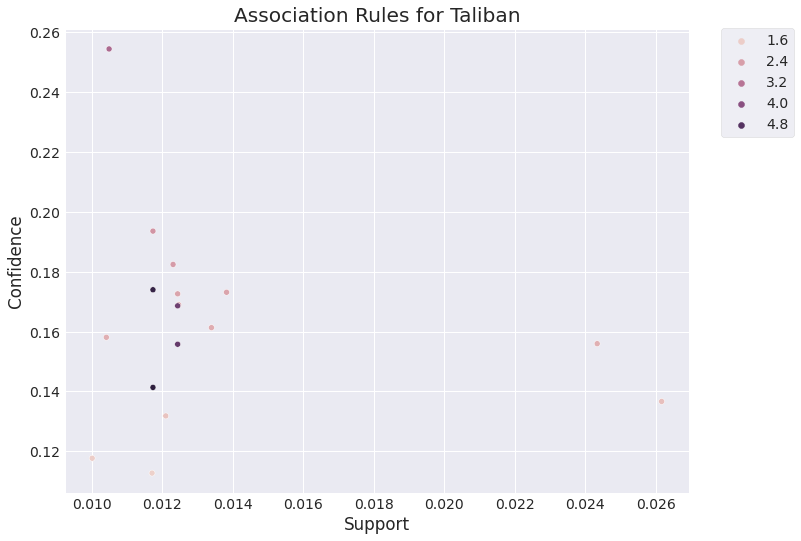

In [212]:
# Create a scatter plot of support vs confidence
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="support", y="confidence", data=taliban_rules, hue = 'lift')

plt.title('Association Rules for Taliban')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

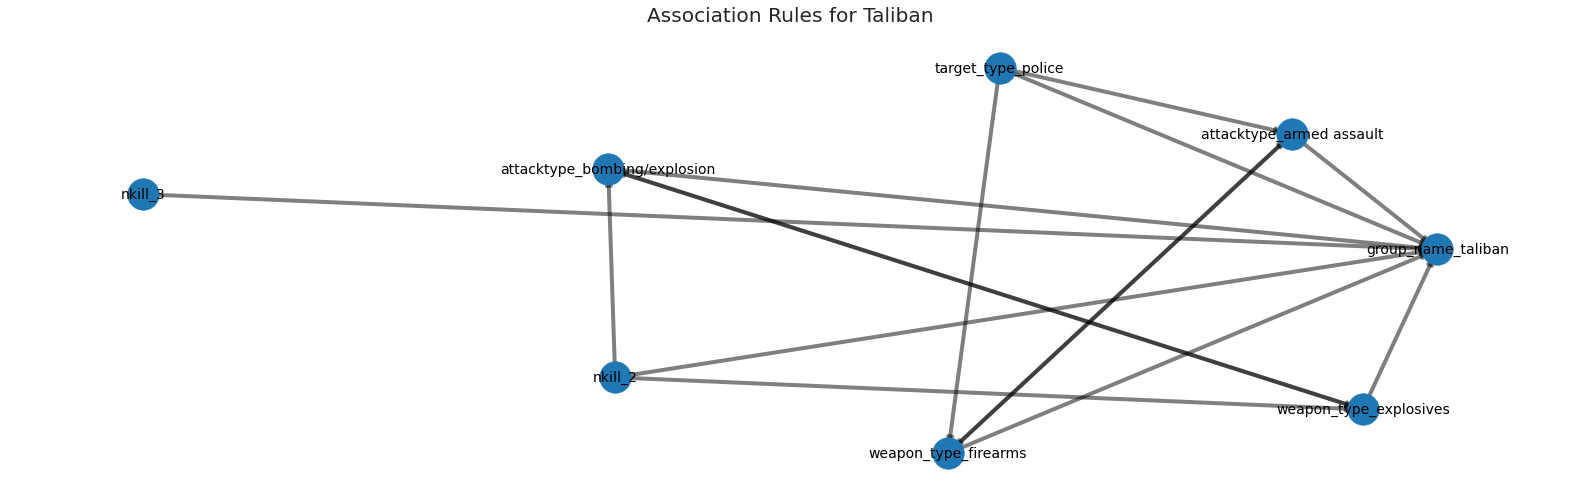

In [213]:
import networkx as nx

# Create a directed graph to represent the association rules
G = nx.DiGraph()

# Add nodes for the antecedents and consequents
for i, rule in taliban_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    G.add_nodes_from(antecedents)
    G.add_nodes_from(consequents)
    
    # Add edges between the antecedents and the consequents
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=rule['support'])

# Set the position of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(25, 8))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=4, alpha=0.5)

# Draw the labels for the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.title('Association Rules for Taliban')
plt.axis('off')
plt.show()


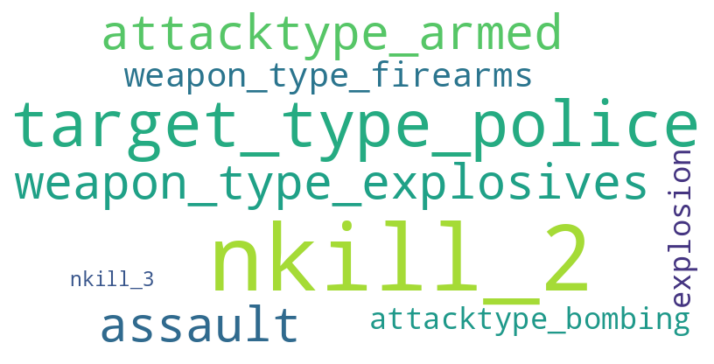

In [214]:
from wordcloud import WordCloud

# Get the antecedents and convert to a string
antecedents = taliban_rules['antecedents'].apply(lambda x: ' '.join(list(x))).values

# Create a string of all antecedents
antecedents_text = ' '.join(antecedents)

# Create the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(antecedents_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


📌 **The analysis produces some fascinating findings: the Taliban demonstrates a high frequency of attacking the police using a range of weapons, with firearms and explosives being the most prevalent. Additionally, their attacks typically result in fewer than 6 fatalities but more than 1.**

Next, we will explore whether we can extract association rules for the top 10 terrorist groups. If a group does not yield any interesting rules, we will exclude them from the analysis.


###**Islamic State of Iraq and the Levant (ISIL) - Association rules.**

In [215]:
target_group = 'islamic state of iraq and the levant (isil)'

isil_rules = apriori(one_hot, min_support=0.01, use_colnames=True, max_len=5)
isil_rules = association_rules(isil_rules, metric="confidence", min_threshold=0.1)
isil_rules = isil_rules[isil_rules['consequents'].apply(lambda x: target_group in str(x))]

isil_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
398,"(target_type_military, attacktype_bombing/expl...",(group_name_islamic state of iraq and the leva...,0.087137,0.049785,0.010800,0.123940,2.489481,0.006462,1.084645
438,"(attacktype_bombing/explosion, target_type_pri...",(group_name_islamic state of iraq and the leva...,0.086424,0.049785,0.016232,0.187819,3.772565,0.011929,1.169954
489,"(nkill_2, attacktype_bombing/explosion)",(group_name_islamic state of iraq and the leva...,0.073745,0.049785,0.012680,0.171941,3.453640,0.009008,1.147520
587,"(weapon_type_explosives, target_type_military)",(group_name_islamic state of iraq and the leva...,0.096706,0.049785,0.011280,0.116638,2.342806,0.006465,1.075679
662,"(weapon_type_explosives, target_type_private c...",(group_name_islamic state of iraq and the leva...,0.089367,0.049785,0.016310,0.182504,3.665811,0.011861,1.162348


In [216]:
output_df_isil = pd.DataFrame(inspect(isil_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_df_isil.sort_values(by='Lift', ascending=False).head(10)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
10,"(weapon_type_explosives, target_type_private c...",(group_name_islamic state of iraq and the leva...,0.015986,0.178877,4.544457
11,"(attacktype_bombing/explosion, target_type_pri...","(weapon_type_explosives, group_name_islamic st...",0.015986,0.184968,4.527707
14,"(nkill_2, attacktype_bombing/explosion)","(weapon_type_explosives, group_name_islamic st...",0.012615,0.171062,4.187297
13,"(nkill_2, weapon_type_explosives)",(group_name_islamic state of iraq and the leva...,0.012615,0.158032,4.014864
9,"(weapon_type_explosives, attacktype_bombing/ex...",(group_name_islamic state of iraq and the leva...,0.015986,0.188474,3.785736
1,"(attacktype_bombing/explosion, target_type_pri...",(group_name_islamic state of iraq and the leva...,0.016232,0.187819,3.772565
4,"(weapon_type_explosives, target_type_private c...",(group_name_islamic state of iraq and the leva...,0.016310,0.182504,3.665811
12,"(nkill_2, weapon_type_explosives, attacktype_b...",(group_name_islamic state of iraq and the leva...,0.012615,0.175126,3.517615
2,"(nkill_2, attacktype_bombing/explosion)",(group_name_islamic state of iraq and the leva...,0.012680,0.171941,3.453640
5,"(nkill_2, weapon_type_explosives)",(group_name_islamic state of iraq and the leva...,0.012926,0.161930,3.252548


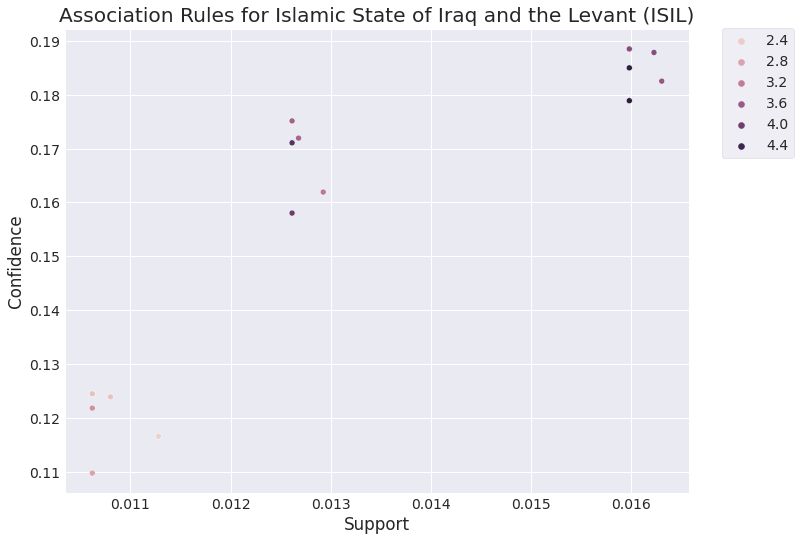

In [217]:
# Create a scatter plot of support vs confidence
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="support", y="confidence", data=isil_rules, hue = 'lift')

plt.title('Association Rules for Islamic State of Iraq and the Levant (ISIL)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

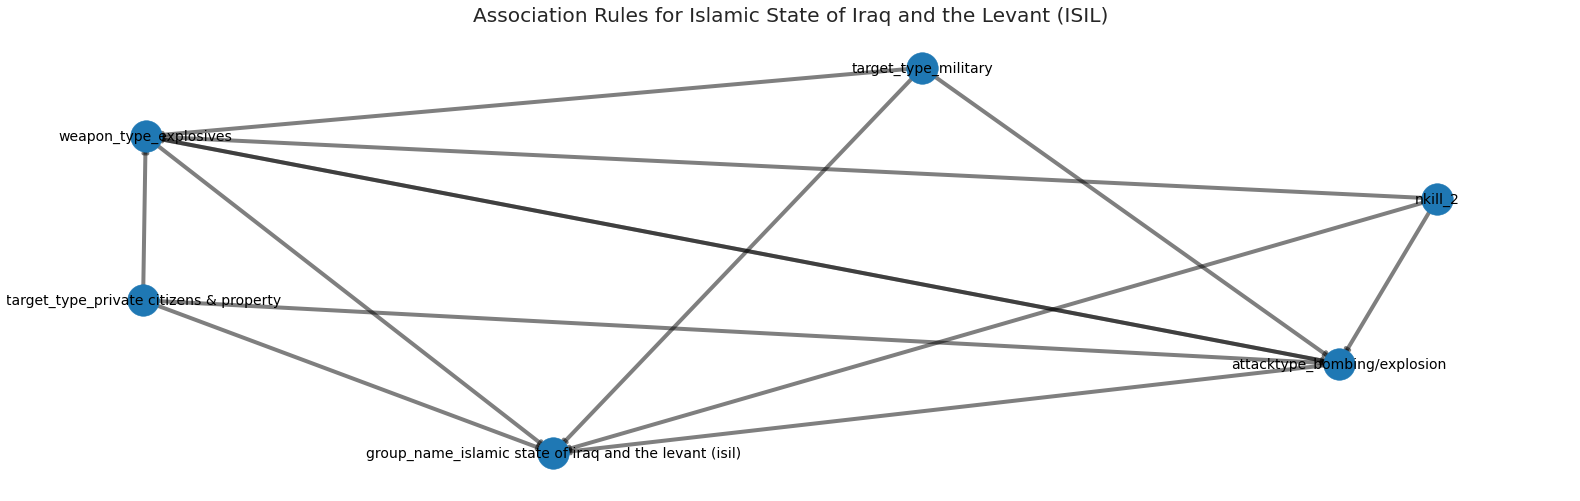

In [218]:
import networkx as nx

# Create a directed graph to represent the association rules
G = nx.DiGraph()

# Add nodes for the antecedents and consequents
for i, rule in isil_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    G.add_nodes_from(antecedents)
    G.add_nodes_from(consequents)
    
    # Add edges between the antecedents and the consequents
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=rule['support'])

# Set the position of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(25, 8))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=4, alpha=0.5)

# Draw the labels for the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.title('Association Rules for Islamic State of Iraq and the Levant (ISIL)')
plt.axis('off')
plt.show()


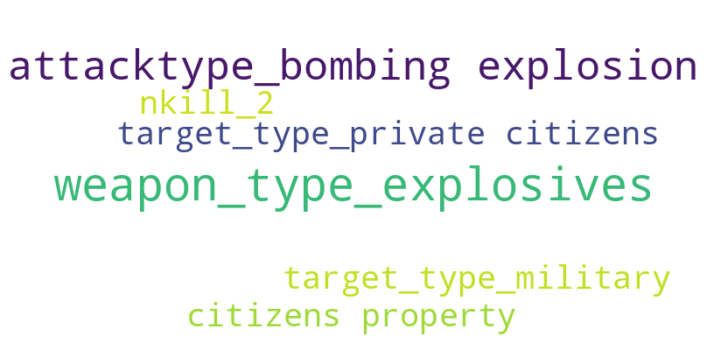

In [219]:
from wordcloud import WordCloud

# Get the antecedents and convert to a string
antecedents = isil_rules['antecedents'].apply(lambda x: ' '.join(list(x))).values

# Create a string of all antecedents
antecedents_text = ' '.join(antecedents)

# Create the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(antecedents_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


📌 **ISIL primarily employs bombs and explosives to target civilians, as they are notorious for their campaigns of terror against innocent individuals. Similar to the Taliban, their attacks also result in relatively few fatalities per incident.**


###**Farabundo Marti National Liberation Front (FMLN) - Association Rules.**

In [220]:
target_group = 'farabundo marti national liberation front (fmln)'

fmln_rules = apriori(one_hot, min_support=0.01, use_colnames=True, max_len=5)
fmln_rules = association_rules(fmln_rules, metric="confidence", min_threshold=0.1)
fmln_rules = fmln_rules[fmln_rules['consequents'].apply(lambda x: target_group in str(x))]

fmln_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
224,"(attacktype_armed assault, target_type_military)",(group_name_farabundo marti national liberatio...,0.103188,0.027693,0.013484,0.130670,4.718485,0.010626,1.118455
583,"(weapon_type_firearms, target_type_military)",(group_name_farabundo marti national liberatio...,0.107622,0.027693,0.014119,0.131189,4.737238,0.011138,1.119124
718,"(attacktype_armed assault, weapon_type_firearm...",(group_name_farabundo marti national liberatio...,0.091766,0.027693,0.013484,0.146934,5.305795,0.010942,1.139779
722,"(attacktype_armed assault, target_type_military)","(weapon_type_firearms, group_name_farabundo ma...",0.103188,0.021768,0.013484,0.130670,6.002789,0.011237,1.125271
724,"(weapon_type_firearms, target_type_military)","(attacktype_armed assault, group_name_farabund...",0.107622,0.019136,0.013484,0.125286,6.547048,0.011424,1.121354


In [221]:
output_df_fmln = pd.DataFrame(inspect(fmln_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_df_fmln.sort_values(by='Lift', ascending=False).head(10)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
4,"(weapon_type_firearms, target_type_military)","(attacktype_armed assault, group_name_farabund...",0.013484,0.125286,6.547048
3,"(attacktype_armed assault, target_type_military)","(weapon_type_firearms, group_name_farabundo ma...",0.013484,0.130670,6.002789
2,"(attacktype_armed assault, weapon_type_firearm...",(group_name_farabundo marti national liberatio...,0.013484,0.146934,5.305795
1,"(weapon_type_firearms, target_type_military)",(group_name_farabundo marti national liberatio...,0.014119,0.131189,4.737238
0,"(attacktype_armed assault, target_type_military)",(group_name_farabundo marti national liberatio...,0.013484,0.130670,4.718485


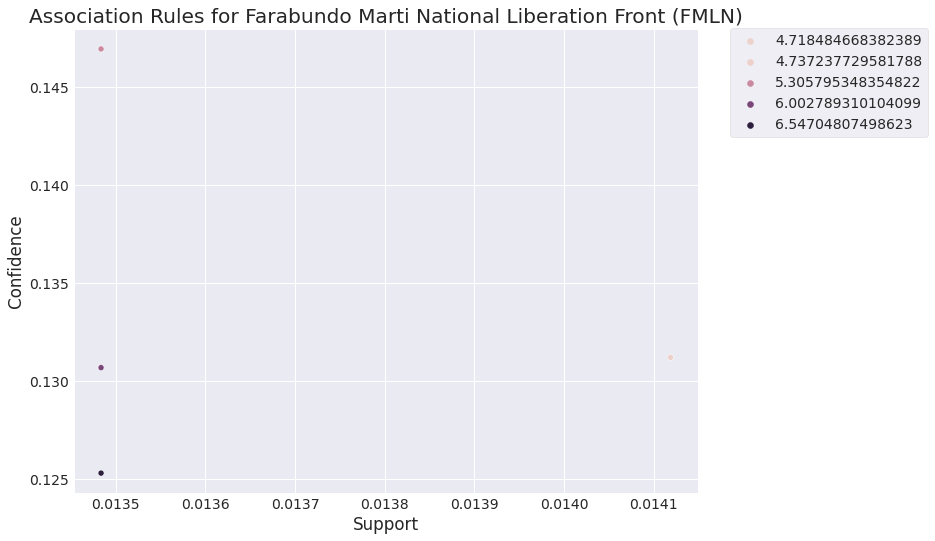

In [222]:
# Create a scatter plot of support vs confidence
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="support", y="confidence", data=fmln_rules, hue = 'lift')

plt.title('Association Rules for Farabundo Marti National Liberation Front (FMLN)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

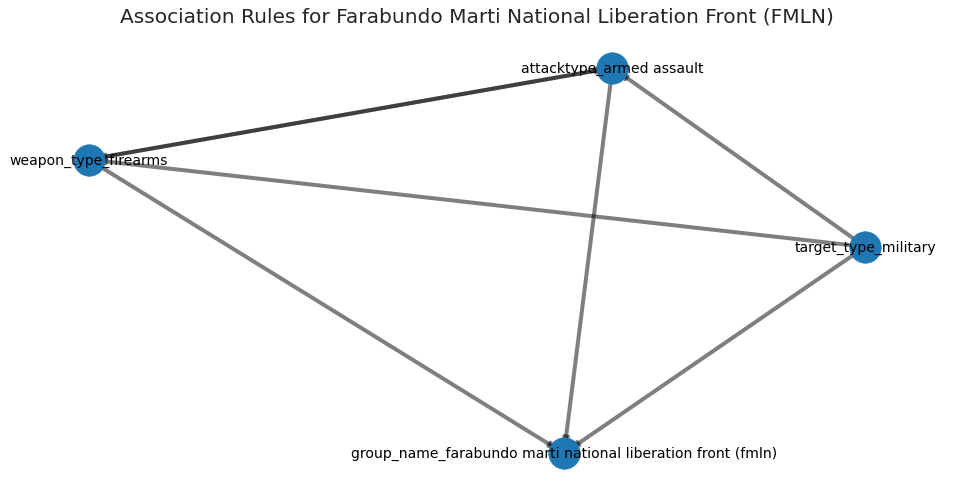

In [223]:
import networkx as nx

# Create a directed graph to represent the association rules
G = nx.DiGraph()

# Add nodes for the antecedents and consequents
for i, rule in fmln_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    G.add_nodes_from(antecedents)
    G.add_nodes_from(consequents)
    
    # Add edges between the antecedents and the consequents
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=rule['support'])

# Set the position of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(15, 8))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=4, alpha=0.5)

# Draw the labels for the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.title('Association Rules for Farabundo Marti National Liberation Front (FMLN)')
plt.axis('off')
plt.show()


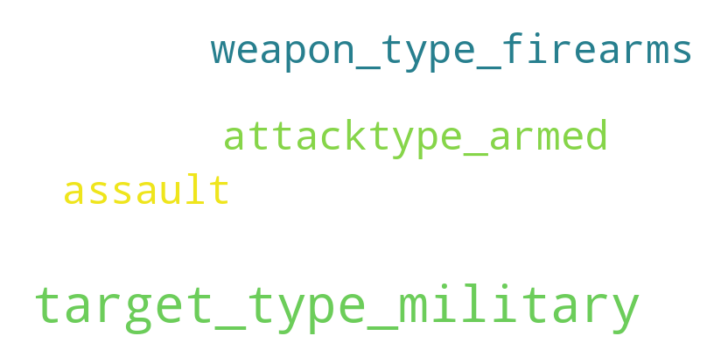

In [224]:
from wordcloud import WordCloud

# Get the antecedents and convert to a string
antecedents = fmln_rules['antecedents'].apply(lambda x: ' '.join(list(x))).values

# Create a string of all antecedents
antecedents_text = ' '.join(antecedents)

# Create the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(antecedents_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


📌 **The Farabundo Marti National Liberation Front (FMLN) appears to target non-citizens and primarily engages in sabotage using bombs and explosives. Military are a common target for their attacks. Interestingly, there is no evidence of the FMLN causing fatalities with their operations, as none of the resulting rules indicate a value of nkill greater than zero.**


### **All Groups**
The remaining groups in the top 10 do not appear to have any noteworthy rules. However, we will include all groups in our analysis to obtain a comprehensive overview.

In [225]:
target_group = ["taliban", "islamic state of iraq and the levant (isil)", "shining path (sl)", "al-shabaab", "new people's army (npa)",
                "irish republican army (ira)", "farabundo marti national liberation front (fmln)", "boko haram", "kurdistan workers' party (pkk)",
                "revolutionary armed forces of colombia (farc)"]

all_rules = apriori(one_hot, min_support=0.01, use_colnames=True, max_len=5)
all_rules = association_rules(all_rules, metric="confidence", min_threshold=0.1)
all_rules = all_rules[all_rules['consequents'].apply(lambda x: any(tg in str(x) for tg in target_group))]

all_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
122,(target_type_police),(group_name_taliban),0.156046,0.074704,0.024335,0.155949,2.087554,0.012678,1.096256
192,(nkill_2),(group_name_taliban),0.191492,0.074704,0.026163,0.136628,1.828927,0.011858,1.071724
194,(nkill_3),(group_name_taliban),0.091779,0.074704,0.012096,0.131798,1.764272,0.005240,1.065761
224,"(attacktype_armed assault, target_type_military)",(group_name_farabundo marti national liberatio...,0.103188,0.027693,0.013484,0.130670,4.718485,0.010626,1.118455
251,"(attacktype_armed assault, target_type_police)",(group_name_taliban),0.067444,0.074704,0.012304,0.182430,2.442033,0.007265,1.131763


In [226]:
output_df_all = pd.DataFrame(inspect(all_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_df_all.sort_values(by='Lift', ascending=False).head(10)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
21,"(weapon_type_firearms, target_type_military)","(attacktype_armed assault, group_name_farabund...",0.013484,0.125286,6.547048
20,"(attacktype_armed assault, target_type_military)","(weapon_type_firearms, group_name_farabundo ma...",0.013484,0.130670,6.002789
24,"(weapon_type_firearms, target_type_police)","(attacktype_armed assault, group_name_taliban)",0.011733,0.141318,5.420185
19,"(attacktype_armed assault, weapon_type_firearm...",(group_name_farabundo marti national liberatio...,0.013484,0.146934,5.305795
23,"(attacktype_armed assault, target_type_police)","(weapon_type_firearms, group_name_taliban)",0.011733,0.173972,5.291246
10,"(weapon_type_firearms, target_type_military)",(group_name_farabundo marti national liberatio...,0.014119,0.131189,4.737238
3,"(attacktype_armed assault, target_type_military)",(group_name_farabundo marti national liberatio...,0.013484,0.130670,4.718485
35,"(nkill_2, weapon_type_explosives)","(attacktype_bombing/explosion, group_name_tali...",0.012433,0.155758,4.585399
29,"(weapon_type_explosives, target_type_private c...",(group_name_islamic state of iraq and the leva...,0.015986,0.178877,4.544457
30,"(attacktype_bombing/explosion, target_type_pri...","(weapon_type_explosives, group_name_islamic st...",0.015986,0.184968,4.527707


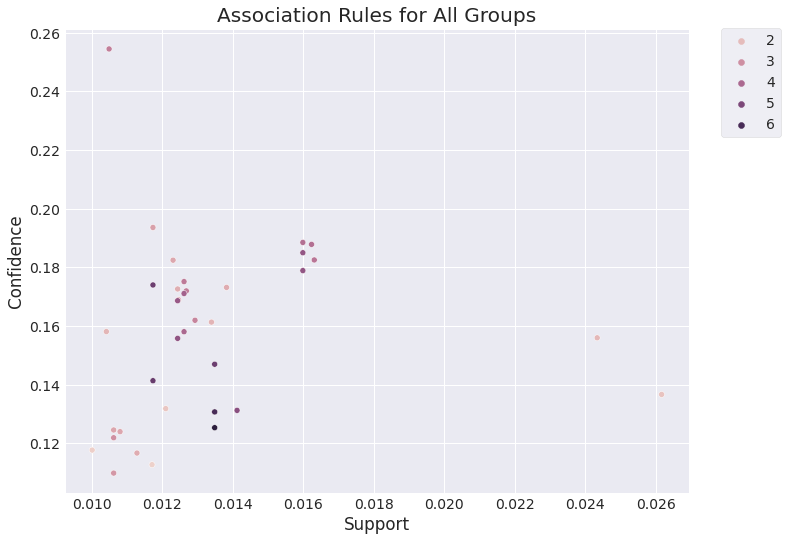

In [227]:
# Create a scatter plot of support vs confidence
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="support", y="confidence", data=all_rules, hue = 'lift')

plt.title('Association Rules for All Groups')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

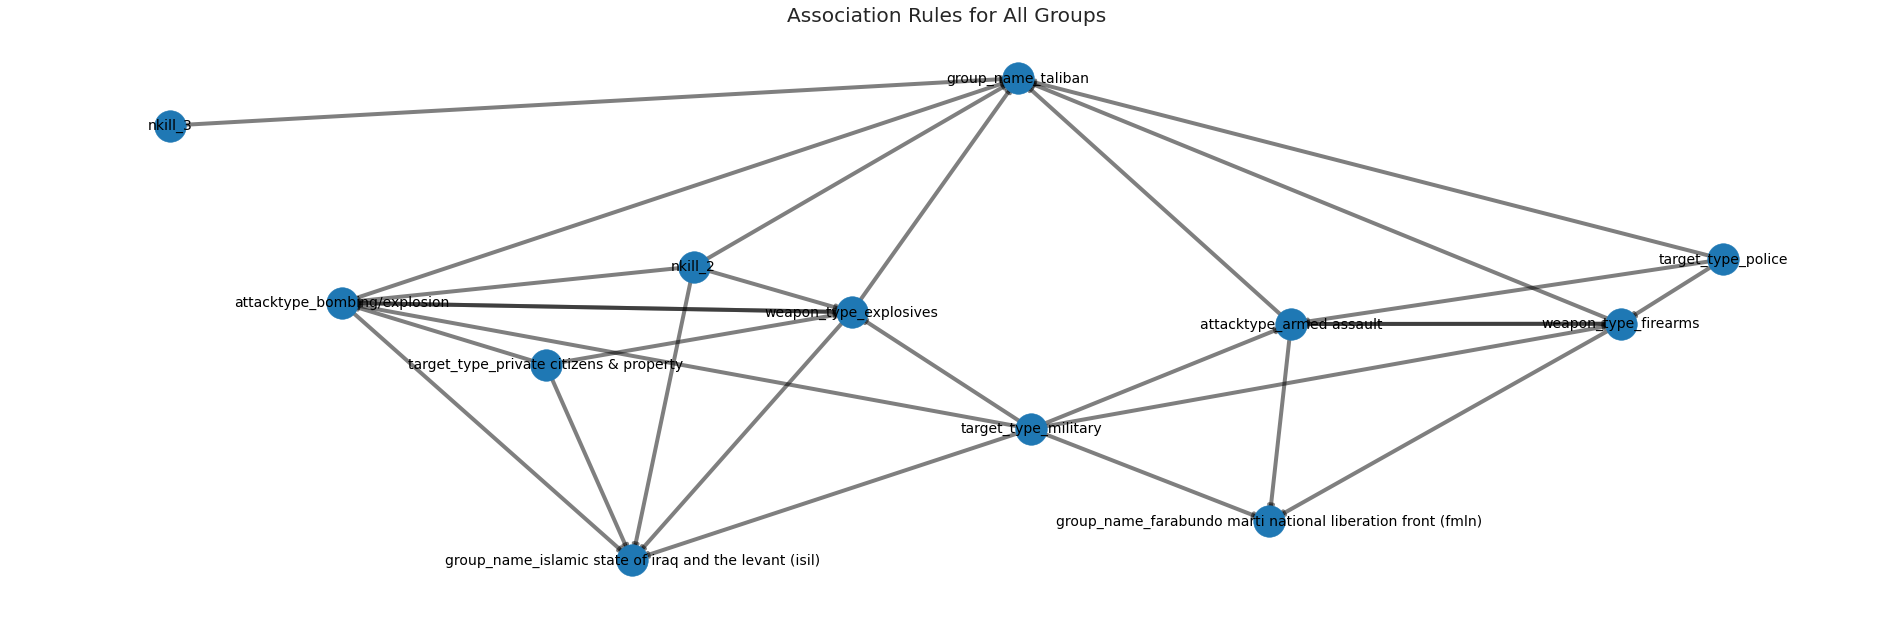

In [228]:
import networkx as nx

# Create a directed graph to represent the association rules
G = nx.DiGraph()

# Add nodes for the antecedents and consequents
for i, rule in all_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    G.add_nodes_from(antecedents)
    G.add_nodes_from(consequents)
    
    # Add edges between the antecedents and the consequents
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=rule['support'])

# Set the position of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=32)

fig, ax = plt.subplots(figsize=(30, 10))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=4, alpha=0.5)

# Draw the labels for the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.title('Association Rules for All Groups')
plt.axis('off')
plt.show()


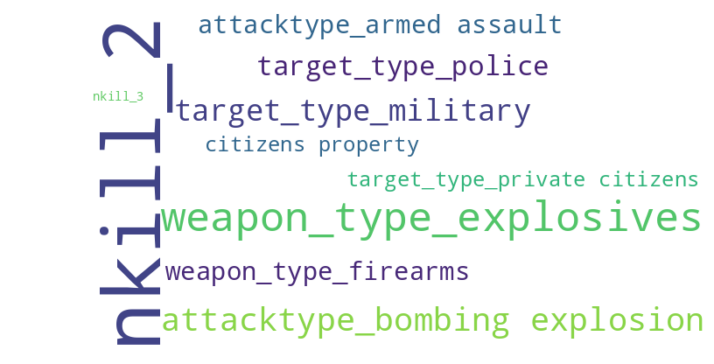

In [229]:
from wordcloud import WordCloud

# Get the antecedents and convert to a string
antecedents = all_rules['antecedents'].apply(lambda x: ' '.join(list(x))).values

# Create a string of all antecedents
antecedents_text = ' '.join(antecedents)

# Create the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(antecedents_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### 📌 **Summary & Conclusion:**

* The Farabundo Marti National Liberation Front (FMLN) has a high association with attacks that involve firearms and targeting the military.
* The Taliban has a high association with attacks that involve firearms and targeting the police.
* The Islamic State of Iraq and the Levant (ISIL) has a high association with attacks that involve explosives and targeting private citizens and property.
* The Taliban has a high association with attacks that involve explosives and result in two deaths.
* There is a strong association between attacks that involve firearms, targeting the military, and being carried out by the FMLN.
* There is a strong association between attacks that involve firearms, targeting the military, and armed assault tactics.
* There is a strong association between attacks that involve explosives, targeting private citizens and property, and being carried out by ISIL.
* There is a strong association between attacks that involve explosives, targeting private citizens and property, and bombing/explosion tactics.





